In [3]:
# Import modules
import tensorflow as tf 
import matplotlib.pyplot as plt   
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Get current directory
import os 
print(f"Current directory: {os.getcwd()}")
curr_dir = os.getcwd()

Current directory: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection


In [5]:
# Training path
train_path = os.path.join(curr_dir, "dataset", "Train")
print(f"Training path: {train_path}")

Training path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Train


In [6]:
# Validation path
valid_path = os.path.join(curr_dir, "dataset", "Valid")
print(f"Validation path: {valid_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Valid


In [7]:
# Testing path
test_path = os.path.join(curr_dir, "dataset", "Test")
print(f"Validation path: {test_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Test


In [8]:
# Load training dataset
train_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 900 files belonging to 3 classes.


In [9]:
# Class names in training dataset
train_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
# Load validation dataset
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [11]:
# Class names in validation dataset
valid_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
# Load testing dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [13]:
# Class names in testing dataset
test_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
# Generate the Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential()

# First block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fourth block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fifth block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Remove 25% of the neurons
cnn.add(tf.keras.layers.Dropout(0.25))

# Reduces dimension of the image
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [15]:
# Compile the CNN
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Summary of the CNN
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
train_history = cnn.fit(x=train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.3507 - loss: 1.1938 - val_accuracy: 0.6400 - val_loss: 0.7797
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6383 - loss: 0.7715 - val_accuracy: 0.7667 - val_loss: 0.5654
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7314 - loss: 0.5599 - val_accuracy: 0.7933 - val_loss: 0.4753
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8423 - loss: 0.3967 - val_accuracy: 0.9067 - val_loss: 0.3404
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8726 - loss: 0.3076 - val_accuracy: 0.8867 - val_loss: 0.2780
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9423 - loss: 0.1573 - val_accuracy: 0.7833 - val_loss: 0.5554
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8677 - loss: 0.3204 - val_accuracy: 0.9300 - val_loss: 0.1711
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9553 - loss: 0.1217 - val_accuracy: 0.9200 - val_loss:

In [18]:
# Compute training loss and training accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.9398 - loss: 0.1806
Training loss: 0.1592661589384079
Training accuracy: 0.9444444179534912


In [19]:
# Compute validation loss and validation accuracy
valid_loss, valid_acc = cnn.evaluate(valid_set)
print(f"Validation loss: {valid_loss}")
print(f"Validation accuracy: {valid_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.9191 - loss: 0.3094
Validation loss: 0.23527322709560394
Validation accuracy: 0.9300000071525574


In [20]:
# Display training history
train_history.history

{'accuracy': [0.41777777671813965,
  0.7122222185134888,
  0.754444420337677,
  0.8455555438995361,
  0.8922222256660461,
  0.9188888669013977,
  0.9011111259460449,
  0.9511111378669739,
  0.9755555391311646,
  0.9755555391311646],
 'loss': [1.0968585014343262,
  0.6582587361335754,
  0.5297418236732483,
  0.38815414905548096,
  0.2586524188518524,
  0.21427853405475616,
  0.25623610615730286,
  0.13427039980888367,
  0.08593381196260452,
  0.06432250887155533],
 'val_accuracy': [0.6399999856948853,
  0.7666666507720947,
  0.7933333516120911,
  0.9066666960716248,
  0.8866666555404663,
  0.7833333611488342,
  0.9300000071525574,
  0.9200000166893005,
  0.9466666579246521,
  0.9300000071525574],
 'val_loss': [0.779668390750885,
  0.5654153227806091,
  0.4752742052078247,
  0.3404231071472168,
  0.27804526686668396,
  0.5553798675537109,
  0.1710871309041977,
  0.2316170483827591,
  0.12220911681652069,
  0.23527325689792633]}

In [ ]:
# Write training history into a JSON file
import json
with open('training_history.json', 'w') as f:
  json.dump(train_history.history, f)

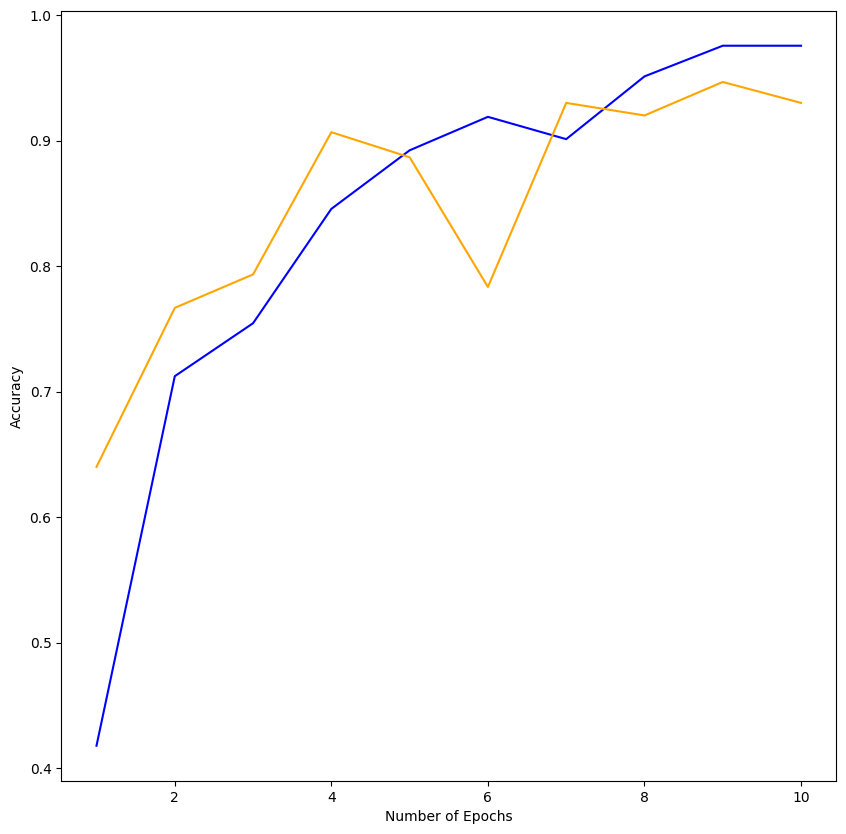

In [22]:
# Plot accuracy for training and validation for various epochs
epochs = [i for i in range(1, 11)]
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, train_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# Save the model
cnn.save('potato_leaf_disease_detection_model.keras')